# Práctico 5 informe

## PCA - Principal Component Analysis

Explicar que es y para que sirve

In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
np.set_printoptions(suppress=True,precision=3)
from matplotlib.patches import FancyArrowPatch

Explicar dataset 

In [64]:
# Importamos los datos utilizando pandas
data=pd.read_csv("./data.csv")

# Creo la tabla de candidatos a mano
candidatos=pd.DataFrame(
    [
        [1,'Oscar Andrade', 'Frente Amplio'],
        [2,'Mario Bergara', 'Frente Amplio'],
        [3,'Carolina Cosse', 'Frente Amplio'],
        [4,'Daniel Martínez', 'Frente Amplio'],
        [5,'Verónica Alonso', 'Partido Nacional'],
        [6,'Enrique Antía', 'Partido Nacional'],
        [8,'Carlos Iafigliola', 'Partido Nacional'],
        [9,'Luis Lacalle Pou', 'Partido Nacional'],
        [10,'Jorge Larrañaga', 'Partido Nacional'],
        [11,'Juan Sartori', 'Partido Nacional'],
        [12,'José Amorín', 'Partido Colorado'],
        [13,'Pedro Etchegaray', 'Partido Colorado'],
        [14,'Edgardo Martínez', 'Partido Colorado'],
        [15,'Héctor Rovira', 'Partido Colorado'],
        [16,'Julio María Sanguinetti', 'Partido Colorado'],
        [17,'Ernesto Talvi', 'Partido Colorado'],
        [18,'Pablo Mieres', 'La Alternativa'],
        [19,'Gonzalo Abella', 'Unidad Popular'],        
        [20,'Edgardo Novick', 'Partido de la Gente'],
        [21,'Cèsar Vega', 'PERI'],
        [22,'Rafael Fernández', 'Partido de los Trabajadores'],
        [23,'Justin Graside', 'Partido Digital'],        
        [24,'Gustavo Salle', 'Partido Verde'],
        [25,'Carlos Techera', 'Partido de Todos']
    ],
    columns=['candidatoId','name','party'],
)

data=data.merge(candidatos,on=['candidatoId'])

# Sólo por si necesita, cargamos un diccionario con el texto de cada pregunta
preguntas={
    '1': 'Controlar la inflación es más importante que controlar el desempleo. ',
    '2': 'Hay que reducir la cantidad de funcionarios pùblicos',
    '3': 'Deberia aumentar la carga de impuestos para los ricos.',
    '4': 'El gobierno no debe proteger la industria nacional, si las fábricas no son competitivas esta bien que desaparezcan.',
    '5': 'La ley de inclusión financiera es positiva para la sociedad. ',
    '6': 'Algunos sindicatos tienen demasiado poder. ',
    '7': 'Cuanto más libre es el mercado, más libre es la gente. ',
    '8': 'El campo es y debe ser el motor productivo de Uruguay. ',
    '9': 'La inversión extranjera es vital para que Uruguay alcance el desarrollo. ',
    '10': 'Los supermercados abusan del pueblo con sus precios excesivos. ',
    '11': 'Con la vigilancia gubernamental (escuchas telefonicas, e-mails y camaras de seguridad) el que no tiene nada que esconder, no tiene de que preocuparse. ',
    '12': 'La pena de muerte debería ser una opción para los crímenes mas serios. ',
    '13': 'Uruguay debería aprobar más leyes anti corrupción y ser más duro con los culpables. ',
    '14': 'Las FF.AA. deberían tener un rol activo en la seguridad pública. ',
    '15': 'Las carceles deberían ser administradas por organizaciones privadas. ',
    '16': 'Hay que aumentar el salario de los policias significativamente. ',
    '17': 'Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años. ',
    '18': 'Uruguay no necesita un ejército. ',
    '19': 'Uruguay es demasiado generoso con los inmigrantes. ',
    '20': 'La ley trans fue un error. ',
    '21': 'El feminismo moderno no busca la igualdad sino el poder. ',
    '22': 'Para la ley no deberia diferenciarse homicidio de femicidio. ',
    '23': 'La separación de estado y religión me parece importante. ',
    '24': 'La legalización de la marihuana fue un error. ',
    '25': 'La legalización del aborto fue un error. ',
    '26': 'El foco del próximo gobierno debe ser mejorar la educación pública. '
}

# Ordeno los datos por partido y luego por candidato

data = data.sort_values(by=['party','name'])
# Para PCA solo usamos las preguntas
questions = data.iloc[:,2:28]
print(questions)

       1  2  3  4  5  6  7  8  9  10  ...  17  18  19  20  21  22  23  24  25  \
19998  4  4  3  4  5  5  3  2  3   4  ...   1   4   1   1   1   1   5   1   1   
19999  3  4  5  2  4  4  2  2  4   4  ...   1   5   2   1   1   2   5   1   1   
20000  2  3  4  2  4  4  2  2  4   3  ...   1   4   2   1   2   2   5   1   1   
20001  4  4  3  4  4  4  3  3  4   4  ...   4   4   2   3   3   2   5   2   2   
20002  4  5  3  3  4  5  5  4  3   3  ...   4   2   3   2   4   4   5   2   1   
20003  2  5  5  1  4  5  1  1  5   5  ...   1   4   2   1   1   1   5   1   1   
20004  3  5  5  1  2  5  4  4  5   3  ...   4   5   2   2   4   5   5   1   1   
20005  2  2  5  2  3  2  1  4  4   4  ...   2   4   1   1   1   1   5   1   1   
20006  3  2  5  3  4  3  2  3  4   4  ...   2   3   2   1   2   5   5   1   1   
20007  3  4  5  2  4  4  1  2  4   2  ...   1   5   1   1   1   1   5   1   1   
20008  1  2  5  1  5  1  1  2  4   5  ...   1   4   1   1   2   4   5   1   1   
20009  4  4  5  3  4  4  4  

Para comenzar, calcularemos media y varianza de cada una de las columnas. 

La media es, por supuesto:

$$ \bar{X} = \frac{\sum_{i=n}^n X_i }{n} $$

Y la varianza mide qué tanto los datos se alejan de la media: 

$$ var(X) = \frac{\sum_{i=n}^n (X_i - \bar{X})(X_i - \bar{X}) }{n-1} $$



In [65]:
mean=np.mean(data,axis=1) 
std=np.std(data,axis=1)
var=np.var(data,axis=1)

print ("Media:",mean)
print ("Varianza:",var)
print ("Desviación estándar:", std)





Media: 19998       4.142857
19999       3.964286
20000       4.071429
20001       4.678571
20002       5.071429
20003       4.500000
20004       5.035714
20005       4.357143
20006       5.107143
20007       5.678571
20008       6.500000
20009       7.500000
20010       7.035714
20011       7.178571
20012       7.285714
20013       6.964286
20014       7.250000
20015       7.857143
20016       8.142857
20017       7.535714
20018       9.035714
20019       9.000000
20020       9.821429
20021       9.142857
20022       9.464286
20023       9.428571
20024       9.214286
20025       9.500000
20026       9.750000
20027      10.392857
            ...     
12215    5096.607143
12216    5123.714286
12217    5148.035714
12218    5149.678571
12219    5156.392857
12220    5161.821429
12221    5215.392857
12222    5229.892857
12223    5234.321429
12224    5244.214286
12225    5244.214286
12226    5254.285714
12227    5255.500000
12228    5259.892857
12229    5274.500000
12230    5284.107143
12231 

La desviación estándar es simplemente la raíz cuadrada de la varianza (la utlizamos porque es comparable con la media).  Observemos que al tomar cuadrados, las desviaciones positivas y negativas de la media _no_ se cancelan. 

Restamos la media a cada dimensión para que nuestro conjunto quede centrado en en el origen

In [66]:
questions_adjust = questions - questions.mean(axis=0)
print (questions_adjust)

mean=np.mean(questions_adjust,axis=0) 
std=np.std(questions_adjust,axis=0)
var=np.var(questions_adjust,axis=0)

print ("Media:",mean)
print ("Varianza:",var)
print ("Desviación estándar:", std)

             1        2         3         4         5         6         7  \
19998  0.99097  0.17903 -0.069036  1.490954  1.809566  0.875982 -0.295405   
19999 -0.00903  0.17903  1.930964 -0.509046  0.809566 -0.124018 -1.295405   
20000 -1.00903 -0.82097  0.930964 -0.509046  0.809566 -0.124018 -1.295405   
20001  0.99097  0.17903 -0.069036  1.490954  0.809566 -0.124018 -0.295405   
20002  0.99097  1.17903 -0.069036  0.490954  0.809566  0.875982  1.704595   
20003 -1.00903  1.17903  1.930964 -1.509046  0.809566  0.875982 -2.295405   
20004 -0.00903  1.17903  1.930964 -1.509046 -1.190434  0.875982  0.704595   
20005 -1.00903 -1.82097  1.930964 -0.509046 -0.190434 -2.124018 -2.295405   
20006 -0.00903 -1.82097  1.930964  0.490954  0.809566 -1.124018 -1.295405   
20007 -0.00903  0.17903  1.930964 -0.509046  0.809566 -0.124018 -2.295405   
20008 -2.00903 -1.82097  1.930964 -1.509046  1.809566 -3.124018 -2.295405   
20009  0.99097  0.17903  1.930964  0.490954  0.809566 -0.124018  0.704595   

In [67]:


'''
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X_r[0,0:int(num_instances/2)] X_r[1,0:int(num_instances/2)], X_r[2,0:int(num_instances/2)], 'o', markersize=8, color='red', alpha=0.5, label='class1')
ax.plot(X_r[0,int(num_instances/2):num_instances], X_r[1,int(num_instances/2):num_instances], X_r[2,int(num_instances/2):num_instances], 'o', markersize=8, color='blue', alpha=0.5, label='class2')

plt.show()
'''


"\nfig = plt.figure(figsize=(8,8))\nax = fig.add_subplot(111, projection='3d')\nplt.rcParams['legend.fontsize'] = 10   \nax.plot(X_r[0,0:int(num_instances/2)] X_r[1,0:int(num_instances/2)], X_r[2,0:int(num_instances/2)], 'o', markersize=8, color='red', alpha=0.5, label='class1')\nax.plot(X_r[0,int(num_instances/2):num_instances], X_r[1,int(num_instances/2):num_instances], X_r[2,int(num_instances/2):num_instances], 'o', markersize=8, color='blue', alpha=0.5, label='class2')\n\nplt.show()\n"

Volvemos a calcular media y varianza:

La covarianza se define como:

$$ cov(X, Y) = = \frac{\sum_{i=n}^n (X_i - \bar{X})(Y_i - \bar{Y}) }{n-1} $$


y es una medida estadística que mide cómo se relacionan dos dimensiones. Si la covarianza es positiva, indica que ambas dimensiones crecen juntas, mientras que si es negativa, indica que cuando una crece, la otra decrece. Si la covarianza es 0, entonces las dimensiones son independientes (es decir, modificar una no afecta a la otra). 

La matriz de covarianza tiene en cada elemento de la diagonal la varianza de la dimensión correspondiente, y en su elemento $ c_{ij}$ la covarianza de las dimensiones $i$ y $j$ (nótese que $cov(i,j)=cov(j,i)$ y por lo tanto la matriz es simétrica

In [68]:
cvm=np.cov(questions_adjust, rowvar = False)
print (cvm)

[[ 1.554  0.439 -0.334  0.362 -0.18   0.375  0.472  0.258  0.282 -0.092
   0.207  0.335  0.163  0.389  0.38   0.12   0.491 -0.246  0.317  0.468
   0.457  0.416 -0.063  0.418  0.303  0.034]
 [ 0.439  2.087 -0.817  0.538 -0.585  0.978  0.933  0.56   0.469 -0.199
   0.264  0.735  0.437  0.907  0.793  0.314  1.134 -0.522  0.563  1.018
   0.938  0.881 -0.112  0.953  0.573  0.182]
 [-0.334 -0.817  2.315 -0.451  0.854 -0.76  -0.998 -0.59  -0.349  0.523
  -0.125 -0.8   -0.219 -1.068 -0.772 -0.156 -1.234  0.83  -0.659 -1.177
  -1.002 -0.872  0.357 -1.167 -0.738  0.   ]
 [ 0.362  0.538 -0.451  2.076 -0.135  0.475  0.639  0.129  0.348 -0.248
   0.151  0.331  0.127  0.419  0.494  0.086  0.57  -0.169  0.238  0.585
   0.538  0.553 -0.066  0.419  0.354 -0.009]
 [-0.18  -0.585  0.854 -0.135  2.275 -0.447 -0.676 -0.586 -0.015  0.164
   0.081 -0.72  -0.199 -0.886 -0.511 -0.127 -1.013  0.665 -0.708 -1.108
  -0.942 -0.708  0.323 -1.145 -0.73  -0.06 ]
 [ 0.375  0.978 -0.76   0.475 -0.447  1.687  0.892  0.5

Como la matriz es simétrica, sabemos que su valores propios son reales, así que vamos a calcularlos, y de esta forma obtendremos las direcciones en las que hay mayor varianza. Utilizamos para eso la función eig de Numpy.

In [69]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cvm)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,26).T

    print('Valor propio {} de la matriz de covarianza {}'.format(i+1, eig_val_cov[i]))
    print('Vector propio:')
    print(eigvec_cov)


Valor propio 1 de la matriz de covarianza 19.062306025668796
Vector propio:
[[-0.092]
 [-0.198]
 [ 0.218]
 [-0.107]
 [ 0.184]
 [-0.186]
 [-0.227]
 [-0.158]
 [-0.092]
 [ 0.036]
 [-0.096]
 [-0.244]
 [-0.088]
 [-0.273]
 [-0.198]
 [-0.064]
 [-0.317]
 [ 0.174]
 [-0.208]
 [-0.306]
 [-0.286]
 [-0.248]
 [ 0.073]
 [-0.297]
 [-0.2  ]
 [-0.02 ]]
Valor propio 2 de la matriz de covarianza 3.3763137295841372
Vector propio:
[[ 0.09 ]
 [ 0.108]
 [ 0.164]
 [ 0.1  ]
 [ 0.325]
 [ 0.15 ]
 [ 0.132]
 [ 0.045]
 [ 0.189]
 [ 0.197]
 [ 0.513]
 [ 0.286]
 [ 0.146]
 [ 0.089]
 [ 0.193]
 [ 0.137]
 [ 0.131]
 [ 0.151]
 [ 0.03 ]
 [-0.228]
 [-0.102]
 [ 0.003]
 [ 0.147]
 [-0.245]
 [-0.322]
 [ 0.053]]
Valor propio 3 de la matriz de covarianza 2.880887862457935
Vector propio:
[[-0.178]
 [-0.296]
 [ 0.194]
 [-0.467]
 [-0.14 ]
 [-0.199]
 [-0.218]
 [ 0.072]
 [-0.188]
 [ 0.315]
 [ 0.244]
 [ 0.352]
 [-0.004]
 [ 0.145]
 [-0.117]
 [-0.022]
 [ 0.056]
 [-0.064]
 [ 0.291]
 [ 0.022]
 [-0.009]
 [-0.144]
 [-0.139]
 [ 0.146]
 [ 0.057]
 

Los vectores propios obtenidos nos indican las direcciones en las que los datos varían más. El vector con el mayor valor propio es el _componente principal_ de la matriz, es decir que muestra la dirección en la que los datos están más dispersos. Y así podemos continuar, viendo las dimensiones donde hay más variación, ordenando los vectores propios según sus valores propios. 

In [101]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)
    #    print(i[0])



(19.062306025668796, array([-0.092, -0.198,  0.218, -0.107,  0.184, -0.186, -0.227, -0.158,
       -0.092,  0.036, -0.096, -0.244, -0.088, -0.273, -0.198, -0.064,
       -0.317,  0.174, -0.208, -0.306, -0.286, -0.248,  0.073, -0.297,
       -0.2  , -0.02 ]))
(3.3763137295841372, array([ 0.09 ,  0.108,  0.164,  0.1  ,  0.325,  0.15 ,  0.132,  0.045,
        0.189,  0.197,  0.513,  0.286,  0.146,  0.089,  0.193,  0.137,
        0.131,  0.151,  0.03 , -0.228, -0.102,  0.003,  0.147, -0.245,
       -0.322,  0.053]))
(2.880887862457935, array([-0.178, -0.296,  0.194, -0.467, -0.14 , -0.199, -0.218,  0.072,
       -0.188,  0.315,  0.244,  0.352, -0.004,  0.145, -0.117, -0.022,
        0.056, -0.064,  0.291,  0.022, -0.009, -0.144, -0.139,  0.146,
        0.057, -0.046]))
(2.414772851070287, array([-0.055,  0.064, -0.325, -0.131, -0.192,  0.048,  0.127,  0.07 ,
       -0.011, -0.201, -0.227,  0.227, -0.008,  0.174,  0.099,  0.016,
        0.158, -0.405, -0.084, -0.248, -0.346, -0.401, -0.025,

Reduciremos las dimensiones a dos para poder visualizarlo graficamente. Notar que hay un gran salto entre el valor propio asociado al primer componente pricipal y el segundo: 19 vs 3.37. Los que nos puede hacer intuir que es este el realmente determinante.



In [119]:
# Nos quedamos con los primeros componentes principales
matrix_w = np.array([eig_pairs[0][1], eig_pairs[1][1]]).T
print('Matrix W:\n', matrix_w)
print('Questions\n', questions_adjust.T)


Matrix W:
 [[-0.092  0.09 ]
 [-0.198  0.108]
 [ 0.218  0.164]
 [-0.107  0.1  ]
 [ 0.184  0.325]
 [-0.186  0.15 ]
 [-0.227  0.132]
 [-0.158  0.045]
 [-0.092  0.189]
 [ 0.036  0.197]
 [-0.096  0.513]
 [-0.244  0.286]
 [-0.088  0.146]
 [-0.273  0.089]
 [-0.198  0.193]
 [-0.064  0.137]
 [-0.317  0.131]
 [ 0.174  0.151]
 [-0.208  0.03 ]
 [-0.306 -0.228]
 [-0.286 -0.102]
 [-0.248  0.003]
 [ 0.073  0.147]
 [-0.297 -0.245]
 [-0.2   -0.322]
 [-0.02   0.053]]
Questions
        19998     19999     20000     20001     20002     20003     20004  \
1   0.990970 -0.009030 -1.009030  0.990970  0.990970 -1.009030 -0.009030   
2   0.179030  0.179030 -0.820970  0.179030  1.179030  1.179030  1.179030   
3  -0.069036  1.930964  0.930964 -0.069036 -0.069036  1.930964  1.930964   
4   1.490954 -0.509046 -0.509046  1.490954  0.490954 -1.509046 -1.509046   
5   1.809566  0.809566  0.809566  0.809566  0.809566  0.809566 -1.190434   
6   0.875982 -0.124018 -0.124018 -0.124018  0.875982  0.875982  0.875982   
7  

Pasamos a la base de vectores propios

In [120]:
# Transform instance to the new subspace

transformed = (matrix_w.T @ questions_adjust.T).T
#  We will need the parties and candidates to plot
transformed = pd.concat([transformed, data[['party', 'name']]], axis=1)
print (transformed)

              0         1           party            name
19998  4.613464  1.991521   Frente Amplio  Carolina Cosse
19999  6.138016  0.139201   Frente Amplio  Carolina Cosse
20000  4.929119  0.369417   Frente Amplio  Carolina Cosse
20001  0.776162 -0.130387   Frente Amplio  Carolina Cosse
20002 -1.682122  2.257092   Frente Amplio  Carolina Cosse
20003  4.930124  2.740461   Frente Amplio  Carolina Cosse
20004  0.403669  1.257157   Frente Amplio  Carolina Cosse
20005  6.764036 -1.345406   Frente Amplio  Carolina Cosse
20006  3.078530  1.034450   Frente Amplio  Carolina Cosse
20007  5.909485  0.443453   Frente Amplio  Carolina Cosse
20008  6.886501 -0.305277   Frente Amplio  Carolina Cosse
20009  0.910870  3.231904   Frente Amplio  Carolina Cosse
20010  1.430585 -1.261656   Frente Amplio  Carolina Cosse
20011  2.391977 -0.425406   Frente Amplio  Carolina Cosse
20012  3.559000 -0.809153   Frente Amplio  Carolina Cosse
20013  8.137785 -0.726321   Frente Amplio  Carolina Cosse
20014  6.15327

Hemos obtenido un nuevo dataset con una dimensión menos, pero que respeta (tanto como es posible) la dispersión de los datos, porque tiene las dos dimensiones de mayor varianza.

Al ver los valores propios, observamos que uno de ellos era mucho mayor que los otros, así que puede tener sentido ver qué sucede si quitamos una dimensión más: 

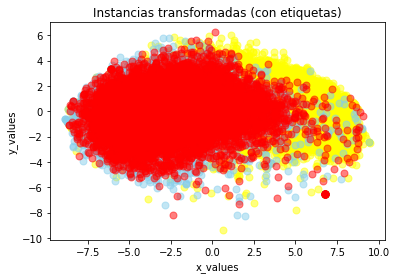

In [125]:
num_instances = len(transformed.index)
plt.plot(transformed[transformed['party'] == 'Frente Amplio'].iloc[:,0],transformed[transformed['party'] == 'Frente Amplio'].iloc[:,1], 'o', markersize=7, color='yellow', alpha=1, label='Frente Amplio')
plt.plot(transformed[transformed['party'] == 'Partido Nacional'].iloc[:,0],transformed[transformed['party'] == 'Partido Nacional'].iloc[:,1], 'o', markersize=7, color='skyblue', alpha=1, label='Partido Nacional')
plt.plot(transformed[transformed['party'] == 'Partido Colorado'].iloc[:,0],transformed[transformed['party'] == 'Partido Colorado'].iloc[:,1], 'o', markersize=7, color='red', alpha=1, label='Partido Colorado')
#plt.plot(transformed[transformed['party'] == 'La Alternativa'].iloc[:,0],transformed[transformed['party'] == 'La Alternativa'].iloc[:,1], 'o', markersize=7, color='black', alpha=1, label='La Alternativa')
#plt.plot(transformed[transformed['party'] == 'Unidad Popular'].iloc[:,0],transformed[transformed['party'] == 'Unidad Popular'].iloc[:,1], 'o', markersize=7, color='grey', alpha=1, label='Unidad Popular')
#plt.plot(transformed[transformed['party'] == 'Partido de la Gente'].iloc[:,0],transformed[transformed['party'] == 'Partido de la Gente'].iloc[:,1], 'o', markersize=7, color='yellowgreen', alpha=1, label='Unidad Popular')
#plt.plot(transformed[transformed['party'] == 'PERI'].iloc[:,0],transformed[transformed['party'] == 'PERI'].iloc[:,1], 'o', markersize=7, color='green', alpha=1, label='PERI')
#plt.plot(transformed[transformed['party'] == 'Partido de los Trabajadores'].iloc[:,0],transformed[transformed['party'] == 'Partido de los Trabajadores'].iloc[:,1], 'o', markersize=7, color='purple', alpha=1, label='Partido de los Trabajadores')
#plt.plot(transformed[transformed['party'] == 'Partido Digital'].iloc[:,0],transformed[transformed['party'] == 'Partido Digital'].iloc[:,1], 'o', markersize=7, color='orange', alpha=1, label='Partido Digital')
#plt.plot(transformed[transformed['party'] == 'Partido Verde'].iloc[:,0],transformed[transformed['party'] == 'Partido Verde'].iloc[:,1], 'o', markersize=7, color='springgreen', alpha=1, label='Partido Verde')
#plt.plot(transformed[transformed['party'] == 'Carlos Techera'].iloc[:,0],transformed[transformed['party'] == 'Carlos Techera'].iloc[:,1], 'o', markersize=7, color='cyan', alpha=1, label='Carlos Techera')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
#plt.legend()
plt.title('Instancias transformadas (con etiquetas)')

plt.show()



In [105]:
# Just one dimension 
matrix_w2 = np.hstack((eig_pairs[0][1].reshape(3,1),))
print('Matrix W:\n', matrix_w2)



ValueError: cannot reshape array of size 26 into shape (3,1)

In [ ]:
transformed2 = np.dot(X_r.T,matrix_w2).transpose()
print (transformed2)

In [ ]:
plt.plot(transformed2[0,0:int(num_instances/2)],np.zeros(int(num_instances/2)), 'o', markersize=7, color='blue', alpha=0.5, label='hombres')
plt.plot(transformed2[0,int(num_instances/2):num_instances],np.zeros(int(num_instances/2)), '^', markersize=7, color='red', alpha=0.5, label='mujeres')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Instancias transformadas (con etiquetas)')

plt.show()